# Column Wrangling

We can create new columns or modify existing ones to createnew ones

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
sales = pd.read_csv('data/sales_data.csv', parse_dates=['Date'])

In [3]:
sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']
sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<Axes: ylabel='Density'>

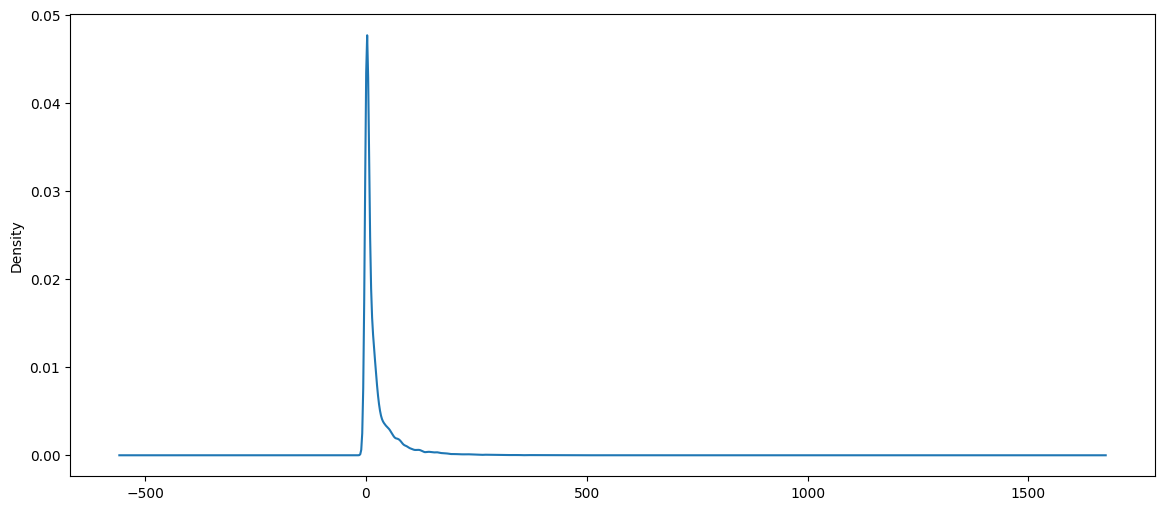

In [4]:
sales['Revenue_per_Age'].plot(kind='density',figsize=(14,6))

<Axes: ylabel='Frequency'>

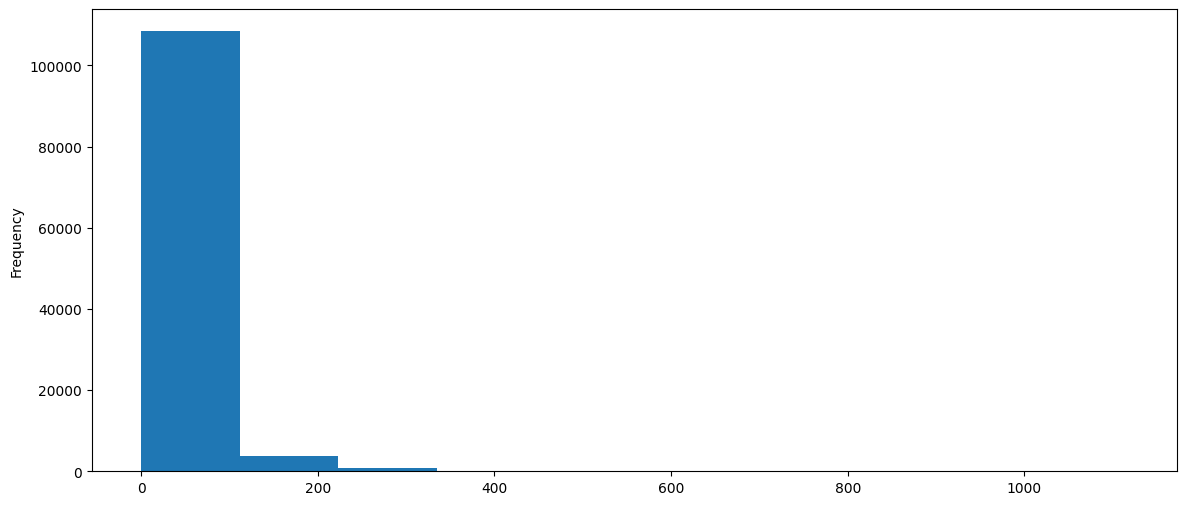

In [5]:
sales['Revenue_per_Age'].plot(kind='hist',figsize=(14,6))

Add and calculate a new Calculated_Cost Column

In [6]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']
sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [8]:
(sales['Calculated_Cost'] != sales['Cost']).sum()
#We will find if we make a mistake order quantity or unit cost this result will be different. 
#This means the calculated cost and cost will be equal.

0

We can see the relationship between Cost and Profit using scatter plot:

<Axes: xlabel='Calculated_Cost', ylabel='Profit'>

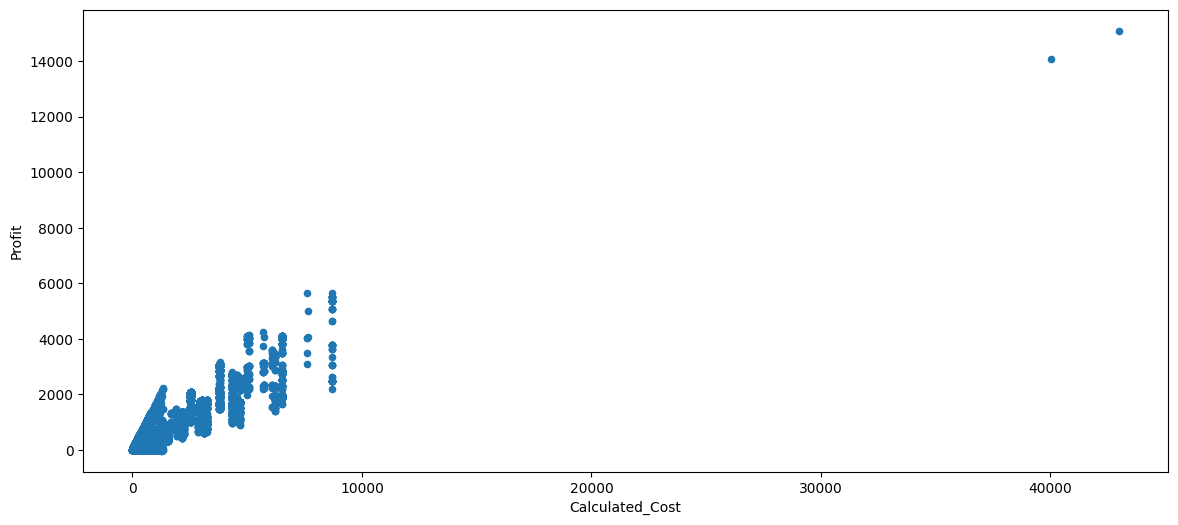

In [10]:
sales.plot(kind='scatter',x='Calculated_Cost',y='Profit',figsize=(14,6))

Add and calculate a new Calculated_Revenue column

In [11]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']
sales['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [12]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

0

In [13]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180,418


<Axes: ylabel='Frequency'>

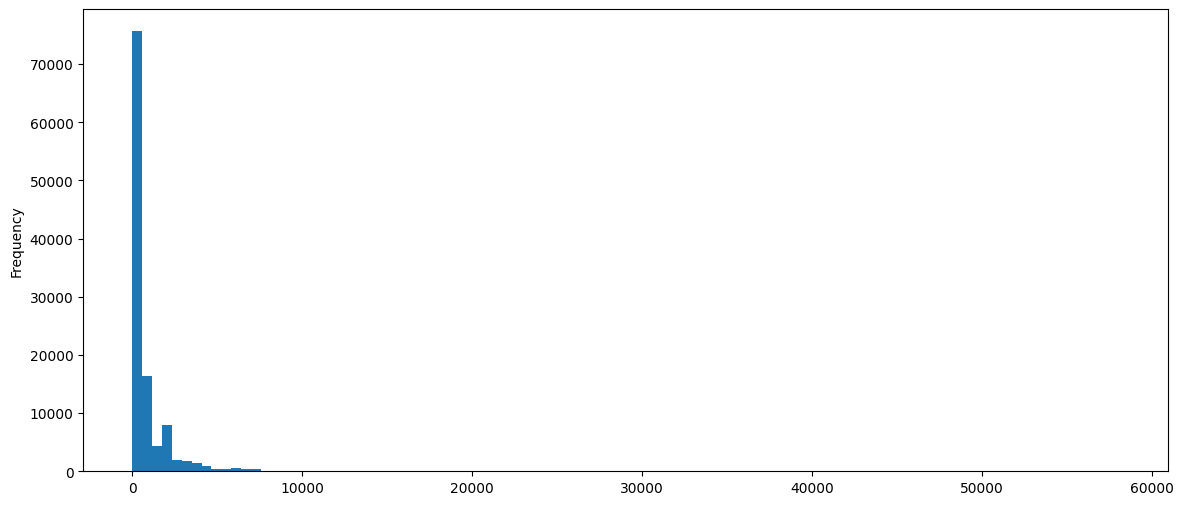

In [19]:
sales['Calculated_Revenue'].plot(kind='hist',bins=100, figsize=(14,6))

### Modify all `Unit_Price` values adding 3% tax to them

In [20]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [21]:
#sales['Unit_Price'] =  sales['Unit_Price] * 1.03
sales['Unit_Price'] *= 1.03

In [22]:
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

## Selection&Indexinng:

### Get all the sales made in the state of `Kentucky`

In [23]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,2,11,30.90,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,21,11,30.90,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,1,11,30.90,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,18,11,30.90,288,198,486,12.150,198,486


### Get the mean revenue of the `Adults (35-64)` sales group

In [24]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

### How many record belong to Age Group Youth (<25) or Adults (35-64)?

In [31]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

### Get the mean revenue of the sales group Adults (35-64) in United States?

In [38]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()
# You can use | for or statement. If you want to and use &.

726.7260473588342

### Increase the revenue by 10% to every sale made in France

In [39]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [41]:
# sales.loc[sales['Country'] == 'France', 'Revenue'] = sales.loc[sales['Country'] == 'France' , 'Revenue' * 1.1
sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1

C:\Users\serap\AppData\Local\Temp\ipykernel_16828\3684477294.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 865.7  865.7 3252.7 ...  473.  1386.  1327.7]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1


In [42]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64